# Module 3 - Chemical Kinetics and Solving 1st Order Differential Equations

## Goals
Use recursive algorithms to solve 1st order ordinary differential equations that govern chemical kinetics over time. This is also applicable to the problem of radiactive decay in physics.

## Decay/irreversible reactions - continuous model

<div style="text-align:center">
    <img src="https://saylordotorg.github.io/text_the-basics-of-general-organic-and-biological-chemistry/section_23/7129ad4acf8ba59772ab4d1faac5783f.jpg" width=600px > 
</div>

ATP hydrolysis is an example of a decay or irreversible reaction. The high energy ATP molecule is not stable for long periods of time at room temperature and it will spontaneously decay into ADP and Pi (inorganic phosphate), which releases energy. In the absence of a catalyst such an enzyme and a source of energy, this reaction is essentially irreversible. Many biological processes use the spontaneous decay of ATP as a 'molecular timer' to control the function of proteins such as enzymes. 

We can represent this process using chemical kinetics

\begin{equation}
\mathrm{ATP} \longrightarrow \mathrm{ADP} + \mathrm{Pi},
\end{equation}

which can be modeled by the following set of differential equations:

\begin{align}
\frac{d\mathrm{[ATP]}}{dt} &= -k \mathrm{[ATP]}\\
\\
\frac{d\mathrm{[ADP]}}{dt} &= k \mathrm{[ATP]}\\
\\
\frac{d\mathrm{[Pi]}}{dt} &= k \mathrm{[ATP]}.
\end{align}

The last two reactions are a consequence of conservation of mass. The kinetic rate, $k$, is the inverse of the characteristic decay time, $\tau = \frac{1}{k}$.

Focusing on the concentration of ATP as a function of time, we can solve analytically the first order ordinary differential equation (ODE) using separation of variables and inregration

\begin{align}
\int_{A_0}^{A(t)} \frac{dA}{A} &= - \int_0^t k dt \\
\\
\log \left( \frac{A(t)}{A_0} \right) &= -kt \\
\\
A(t) &= A_0 \mathrm{e}^{-kt},
\end{align}

where we have used the notation of $A(t) = \mathrm{[ATP]}(t)$ for simplicity.

### Related reading
- Chapter 15.2 of Physical Biology of the Cell
- Chapter 1 - Giordano (radioactive decay)
- Chapter 4.5 - Landau (radioactive decay)
<!--http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/CP04.html#4.5 (html notebook)
http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/CP04.ipynb (IPython notebook)-->

Text(0.5, 0, '$t/\\tau$')

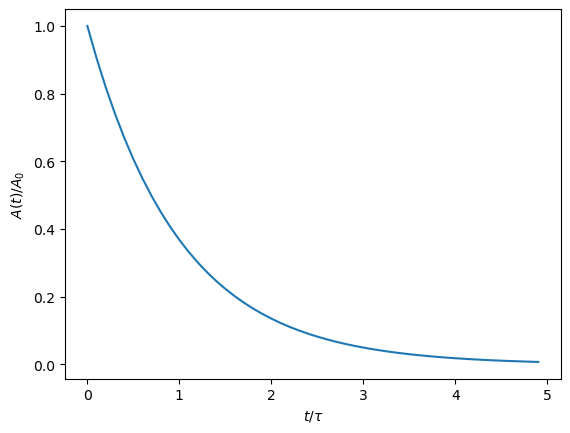

In [1]:
## Let's plot solution to our kinetic equation using simplified constants
## k = 1 and A_0 = [ATP]_0 = 1

import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0,5,0.1)            # Plot over a time range of 5 characteristic time units
plt.plot(t,np.exp(-t))
plt.ylabel(r'$A(t)/A_0$')
plt.xlabel(r'$t/\tau$')

## A Numerical Approach for the continuous decay model (Giordano Ch. 1)

### Question: How do find a discretized solution to the ODE?

#### Forward derivative - finite difference equation from Taylor expansion

We can discretely solve a generic differential equation of the form

\begin{equation}
\frac{df}{dt}=g(t,f)
\end{equation}

using the method of finite differences. Starting with the Taylor expansion of any function around a known point $t$, 

\begin{equation}
f(t+\Delta t) = f(t) + \frac{df}{dt}\Delta t + \frac{1}{2} \frac{d^2 f}{dt^2} \Delta t^2 + \mathrm{O}\left(\Delta t^3\right),
\end{equation}

we can write a finite diference equation to approximate the first derivative of our function assuming that $\Delta t \ll 1$:

\begin{equation}
\frac{df(t)}{dt} \approx \frac{f(t+\Delta t) - f(t)}{\Delta t},
\end{equation}

where the error in the derivative is of order $\mathrm{O}\left(\Delta t^2\right)$. This finite difference equation is known as the **forward derivative**.

### Euler's method - Numerical solution to the first order ODEs

We can solve the general ODE problem using the forward difference equation as follows 

\begin{align}
\frac{df(t)}{dt} &= g(t,f) \\
\\
\frac{f(t+\Delta t) - f(t)}{\Delta t} &= g(t,f) \\
\\
f(t+\Delta t) &\approx f(t) + g(t,f)\Delta t.
\end{align}

This is known as **Euler's method** (see Appendix A of Giordano and Nakanishi). Using the discrete notation, $t_n = n\Delta t$ and $f_n=f(t_n)$, our iterative equation becomes

\begin{equation}
f_{n+1} \approx f_n + g_n\Delta t.
\end{equation}

While the error in the derivative was of order $\mathrm{O}\left(\Delta t^2\right)$, the error in our iterative solution to the ODE is of order $\mathrm{O}\left(\Delta t\right)$. We can apply Euler's method above to solve our kinetic equations numerically

\begin{align}
\frac{dA(t)}{dt} & = -kA(t) \\
\\
\Rightarrow \frac{A(t+\Delta t) - A(t)}{\Delta t} &\approx -kA(t) \\
\\
A(t+\Delta t) &\approx \left(1-k\Delta t\right)A(t) \\
\\
A_{n+1} &\approx \left(1-k\Delta t\right)A_n.
\end{align}  

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Use Euler's method to solve the continuous ATP decay equation. Euler's method prescribes a well defined way for finding an approximate solution to our unknown function at a later time $t+\Delta t$ based on the current value of the function. Starting with a known initial value of $A(t=0)$, use a `for` loop to find a solution up to some maximum time $t_{\mathrm{max}}$. Start with values of $dt = 0.05$, $\tau = 1.0$, $k=1/\tau$, $A_0=1.0$ and $t_{\mathrm{max}}=5.0$. You will need two arrays for storage: one for the solution and a second one for the corresponding times. Create a plot that compares your numerical result to the analytical solution $A(t) = A(0) \mathrm{e}^{-kt}$. Plot $\frac{A(t)}{A_0}$ vs $\frac{t}{\tau}$ for easier comparison later on.
</div>

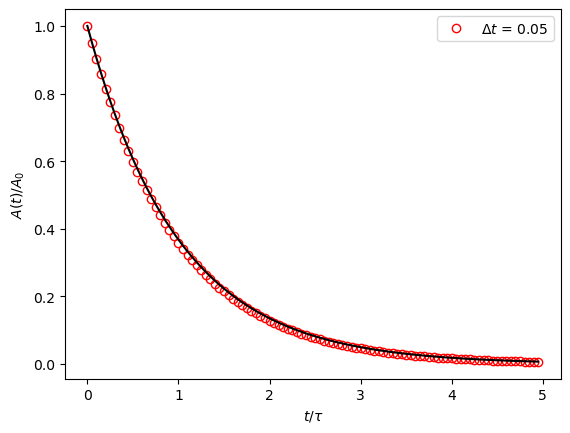

In [17]:
dt = 0.05
tmax = 5
tau = 1.0
k = 1.0/tau
A0 = 1.0

## insert code here ##
t = np.arange(0, tmax, dt)
A = A0*np.ones_like(t)

for n in range(len(A)-1):
    A[n+1] = (1 - k*dt)*A[n]

plt.figure()
plt.plot(t/tau, A/A[0],'o',mfc='None',mec='red',label=r'$\Delta t$ = {0}'.format(dt))
plt.plot(t/tau,np.exp(-k*t),'k-')
plt.legend()
plt.ylabel(r'$A(t)/A_0$')
plt.xlabel(r'$t/\tau$')
plt.show()

### How does this solution behave for large $\Delta t$?
The error in our numerical solution depends on the choice of $\Delta t$. We can test the accuracy of our solution for various choices.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
For simplicity, rewrite the code above as a function, `atp_decay()`, that finds the solution for $A(t)$ given some initial input values such as $A_0$, $\Delta t$, $t_{\mathrm{max}}$, and $\tau$. Use this function in the code below to compare the numerical solutions for given values of $\Delta t=$ 0.05, 0.5, and 1.
</div>

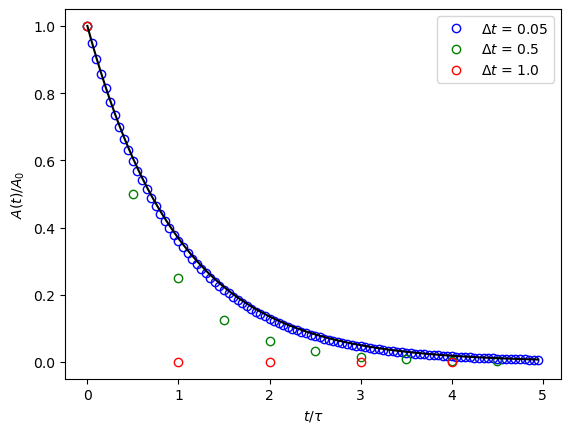

In [18]:
def atp_decay(A0, dt, tmax, tau):
    ## insert code here ##
    t = np.arange(0, tmax, dt)
    A = A0*np.ones_like(t)

    for n in range(len(A)-1):
        A[n+1] = (1 - dt/tau)*A[n]
    
    return t,A

plt.figure()
tmax = 5
colors = ('b', 'g', 'r')                      # tuple with the list of colors to be used in the plot
i = 0
for dt in (0.05, 0.5, 1.0):                   # iterate over tuple of time steps
    t,A = atp_decay(1.0, dt, 5.0, 1.0)
    plt.plot(t/tau, A/A[0],'o',mfc='None',mec=colors[i],label=r'$\Delta t$ = {0}'.format(dt))  
    # used the .format() method to include a numerical value in the string 
    i+=1
t = np.arange(0, tmax, 0.05)
plt.plot(t/tau,np.exp(-k*t),'k-')
plt.legend()
plt.ylabel(r'$A(t)/A_0$')
plt.xlabel(r'$t/\tau$')
plt.show()

## ATP decay - discrete model
While we previously approximated the spontaneous decay of ATP molecules as a continuous process, at the molecular level this decay is inherently discrete. 

We can describe the decay process for an individual molecule by a discrete time-step ($\Delta t$) trajectory, where the molecule decays after $N$ time steps. The probability that a molecule will decay at every discrete time step is given by the product of the decay rate and the time interval, $p_{\mathrm{decay}}=k\Delta t$. Increasing the time interval grows the chances that the molecule will decay. Normalization requires that the probability that the molecule will not decay after a time $\Delta t$ is given by $p_{\mathrm{no-decay}}=1 - k\Delta t$.

The probability that the molecule will decay in a time interval between time $t$ and $t + \Delta t$, i.e., after taking $N$ discrete steps of size $\Delta t = t/N$, is therefore given by

\begin{align}
P(t)\Delta t = \underbrace{(1-k\Delta t) \times (1-k\Delta t) \times \dots \times (1-k\Delta t)}_{N\text{ time steps}} \times k\Delta t,
\end{align}

where $P(t)$ is the probability density. We can simplify this relation as

\begin{align}
P(t)\Delta t &= \left(1-k\Delta t\right)^N k\Delta t\\
\\
&= \left(1-k \frac{t}{N}\right)^N k\Delta t.
\end{align}

The limit of a large number of molecules, $N\rightarrow \infty$, our probability density recovers the continuous distribution we obtained earlier

\begin{align}
P(t)\Delta t = \lim_{N\to\infty} \left(1-k \frac{t}{N}\right)^N k\Delta t = e^{-kt}k\Delta t,
\end{align}

where we have used the indentity that $e^{-x} = \lim_{N\to\infty} (1 - x/N)^N$.

### Related reading
- Chapter 15.2 of Physical Biology of the Cell


##  A numerical approach for the discrete decay model

### Question: How do we simulate probabilistic events?

The probability of observing an event must always be normalized: the sum of the probabilities of all possible outcomes must always equal to 1. We can use a uniformly distributed random number (between 0 and 1, such as those produced by `numpy.random.random()`) to decide wether a decay event takes place given a known decay rate.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Starting with a known decay rate ($\tau = 1$ and $k = 1/\tau$), time step ($\Delta t = 0.005$), maximum time ($t_{\mathrm{max}}=5$), and initial number of molecules ($A_0 = 10,000$), write a code that models the discrete decay process over time. At each time step, you will need to "probe" each molecule to determine if it should decay during the given time interval. 
<br/>
<br/>
Assuming we have a random number, $R$, between 0 and 1, you can do this by comparing the value of $R$ to the probability $P(t)\Delta t = k \Delta t$. If the $R < k \Delta t$ the molecule decays and otherwise you keep it. Keep track of all the moecules that decay during a time step, and subtract this from the total number of undecayed molecules, $A(t+\Delta t) = A(t) - \Delta A(t)$ or $A_{n+1} = A_n - \Delta A_n$. Continue this process until you have reached the maximum time. You can do this inside a `for` or a `while` loop. Store the total number of undecayed molecules at each time step and create a plot of $A(t)/A_0$ vs $t/\tau$ and compare to the analytical exponential solution of $A(t)=A_0e^{-k t}$.
</div>

In [8]:
tmax = 5
dt = 0.005
tau = 1.0
k = 1.0/tau
A0 = 10000

## Insert your code here ##

t = np.arange(0, tmax, dt)     # array of discrete times
A = A0*np.ones_like(t, dtype=np.int64) # array of number of molecules at a given time
                                       # we explicitly tell numpy that it's an array of integers 

for n in range(len(t)-1):      # iterate over all discrete time steps
    nDecay = 0
    for i in range(A[n]):      # iterate over all the un-decayed molecules at a given time
        R = np.random.random() # attempt for a single decay event
        if (R < k*dt):         # if attempt is lower than P(t) = k*dt, then the molecule decays
            nDecay +=1
    A[n+1] = A[n] - nDecay

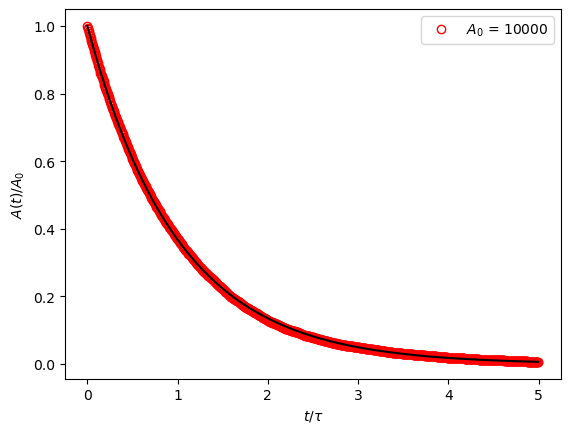

In [10]:
plt.figure()
plt.plot(t/tau, A/A[0],'o',mfc='None',mec='red',label=r'$A_0$ = {0}'.format(A[0]))
plt.plot(t/tau, np.exp(-k*t),'k-')
plt.legend()
plt.ylabel(r'$A(t)/A_0$')
plt.xlabel(r'$t/\tau$')
plt.show()

### What happens for lower numbers of molecules?
<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
For simplicity, rewrite the code above for the discrete ATP decay problem as a function, `atp_decay_discrete()`, that finds the solution for $A(t)$ given some initial input values such as $A_0$, $\Delta t$, $t_{\mathrm{max}}$, and $\tau$. Use this function in the code below to compare the numerical solutions for given values of $A_0=$ 1000, 100, and 10.
</div>

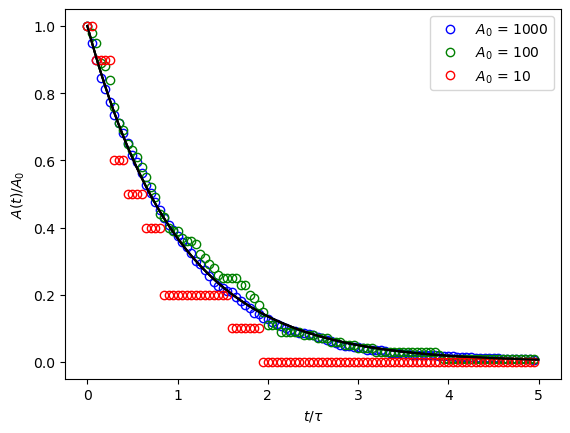

In [16]:
def atp_decay_discrete(A0, dt, tmax, tau):
    ## insert code here ##
    k = 1.0/tau
    t = np.arange(0, tmax, dt)     # array of discrete times
    A = A0*np.ones_like(t, dtype=np.int64)           # array of number of molecules at a given time

    for n in range(len(t)-1):      # iterate over all discrete time steps
        nDecay = 0
        for i in range(A[n]):      # iterate over all the un-decayed molecules at a given time
            R = np.random.random() # attempt for a single decay event
            if (R < k*dt):   # if attempt is lower than P(t) = k*dt, then molecule decays
                nDecay +=1
        A[n+1] = A[n] - nDecay
    return t,A

tmax = 5
dt = 0.005
tau = 1.0
k = 1.0/tau
plt.figure()
colors = ('b', 'g', 'r')

c = 0
for A0 in (1000, 100, 10):
    t,A = atp_decay_discrete(A0, dt, tmax, tau)
    
    plt.plot(t[::10]/tau, A[::10]/A[0],'o',mfc='None',mec=colors[c],label=r'$A_0$ = {0}'.format(A[0]))
    plt.plot(t/tau,np.exp(-k*t),'k-')
    c+=1

plt.legend()
plt.ylabel(r'$A(t)/A_0$')
plt.xlabel(r'$t/\tau$')
plt.show()